Epoch 1/100
0s - loss: 0.0461
Epoch 2/100
0s - loss: 0.0227
Epoch 3/100
0s - loss: 0.0160
Epoch 4/100
0s - loss: 0.0143
Epoch 5/100
0s - loss: 0.0134
Epoch 6/100
0s - loss: 0.0126
Epoch 7/100
0s - loss: 0.0116
Epoch 8/100
0s - loss: 0.0106
Epoch 9/100
0s - loss: 0.0095
Epoch 10/100
0s - loss: 0.0083
Epoch 11/100
0s - loss: 0.0071
Epoch 12/100
0s - loss: 0.0059
Epoch 13/100
0s - loss: 0.0048
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0031
Epoch 16/100
0s - loss: 0.0026
Epoch 17/100
0s - loss: 0.0024
Epoch 18/100
0s - loss: 0.0022
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0021
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0021
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0021
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

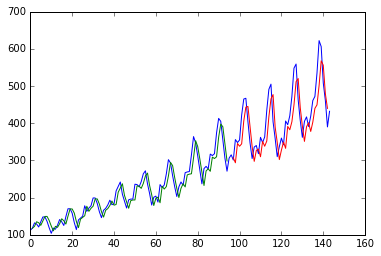

In [7]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import utils as ut
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Test Score: 50.0253 RMSE
Simple Score: 48.6203 RMSE
Train Score: 23.1378 RMSE


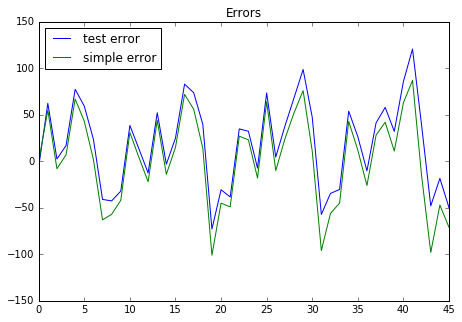

In [9]:
def calcmse (x, y):
    #Predictor comparison
    res = x - y
    res_e = np.sqrt(np.mean(res**2))
    #print(res_e)
    return res_e, res

simpletestY = np.roll(testY[0],1)
simpletestY[0] = simpletestY[1]

tr_e, tr_e_ar = calcmse(trainY[0], trainPredict[:,0])
te_e, te_e_ar = calcmse(testY[0], testPredict[:,0])
si_e, si_e_ar = calcmse(testY[0], simpletestY)

print ('Test Score: %.4f RMSE' % (te_e))
print ('Simple Score: %.4f RMSE' % (si_e))

print ('Train Score: %.4f RMSE' % (tr_e))

ut.figurefullwidth()
ut.subplot(1)
ut.subplottitle(1, "Errors")
plt.plot(te_e_ar, label="test error")
plt.plot(si_e_ar, label="simple error")
plt.legend(loc='best')